# Classification: Performance of the Naive Bayes algorithm on the given data set
Run theNaive Bayes tool on the resulting version of **`train_gr_smpl`**. To be able to do this in Weka, you may
need to apply several Weka “Filters”. Explain the reason for choosing and using these filters. Once
you can run the algorithm, record, compare and analyse the classifier’s accuracy on different classes
(as given by the confusion matrix).

### Proportional k-interval discretization
 According to the course textbook Equal Frequency binning is excellent for Naive bayes.
 
 **Specifically when the number of bins is equal to the sqaure root of the number of instances.** This is called Proportional k-interval discretization

In a nutshell Naive Bayse should find the probability of each of the 10 classes given each pixel. 
We should expect 10 output values per instance we are predicting that sum to 1. With the highest probability being the best guess of the class attribute according to naive bayse.


* Preprocess (filter the data) data
    * normalize the data filter
    * Scipy / Keras maybe
    * Justify how / why 
* 

[See here for scikit learn naive bayse](https://scikit-learn.org/stable/modules/naive_bayes.html)

In [1]:
from Scripts import helperfn as hf
from Scripts.NaiveBayse import NaiveBayseGaussian as nbg
from Scripts.NaiveBayse import NaiveBayseCategorical as nbc
from Scripts import confusionMatrix as cms
from Scripts import plotScripts as ps
%load_ext autoreload
%autoreload 2

import numpy as np

## Perform Naive Bayse on random sample of full data
### Get the classifier, scores, and data used

In [2]:
unbal_classifers, unbal_scores, unbal_data = nbg.build_nbg_models(balance_classes=False, random_state=89)
bal_classifers, bal_scores, bal_data = nbg.build_nbg_models(balance_classes=True, random_state=89)
d_classifiers, d_scores, d_data = nbg.build_nbg_models(downscale=True, balance_classes=False, random_state=72)
dbal_classifiers, dbal_scores, dbal_data = nbg.build_nbg_models(downscale=True, balance_classes=True, random_state=72)


In [1]:
ewb_unbal_classifers, ewb_unbal_scores, ewb_unbal_data = nbc.build_nbc_models(ewb=True, balance_classes=False, random_state=89)
ewb_bal_classifers, ewb_bal_scores, ewb_bal_data = nbc.build_nbc_models(ewb=True, balance_classes=True, random_state=89)
ewb_d_classifiers, ewb_d_scores, ewb_d_data = nbc.build_nbc_models(ewb=True, downscale=True, balance_classes=False, random_state=72)
ewb_dbal_classifiers, ewb_dbal_scores, ewb_dbal_data = nbc.build_nbc_models(ewb=True, downscale=True, balance_classes=True, random_state=72)


NameError: name 'nbc' is not defined

## Classifier scores
#### Classification accuracy when scored against its label

In [4]:
unbal_train_score, unbal_test_score = ps.unzip_scores(unbal_scores)
bal_train_score, bal_test_score = ps.unzip_scores(bal_scores)
d_train_score, d_test_score = ps.unzip_scores(d_scores)
dbal_train_score, dbal_test_score = ps.unzip_scores(dbal_scores)

unbal_train_score, unbal_test_score = unbal_train_score * 100, unbal_test_score * 100
bal_train_score, bal_test_score = bal_train_score * 100, bal_test_score * 100
d_train_score, d_test_score = ps.convert_percentage(ps.unzip_scores(d_scores))
dbal_train_score, dbal_test_score = dbal_train_score * 100, dbal_test_score * 100

train_scores = [unbal_train_score.astype(int), bal_train_score.astype(int), d_train_score.astype(int), dbal_train_score.astype(int)]
test_scores = [unbal_test_score.astype(int), bal_test_score.astype(int), d_test_score.astype(int), dbal_test_score.astype(int)]

In [5]:
ewb_unbal_train_score, ewb_unbal_test_score = ps.unzip_scores(ewb_unbal_scores)
ewb_bal_train_score, ewb_bal_test_score = ps.unzip_scores(ewb_bal_scores)
ewb_d_train_score, ewb_d_test_score = ps.unzip_scores(ewb_d_scores)
ewb_dbal_train_score, ewb_dbal_test_score = ps.unzip_scores(ewb_dbal_scores)

ewb_unbal_train_score, ewb_unbal_test_score = ewb_unbal_train_score * 100, ewb_unbal_test_score * 100
ewb_bal_train_score, ewb_bal_test_score = ewb_bal_train_score * 100, ewb_bal_test_score * 100
ewb_d_train_score, ewb_d_test_score = ps.convert_percentage(ps.unzip_scores(ewb_d_scores))
ewb_dbal_train_score, ewb_dbal_test_score = ewb_dbal_train_score * 100, ewb_dbal_test_score * 100

ewb_train_scores = [ewb_unbal_train_score.astype(int), ewb_bal_train_score.astype(int), ewb_d_train_score.astype(int), ewb_dbal_train_score.astype(int)]
ewb_test_scores = [ewb_unbal_test_score.astype(int), ewb_bal_test_score.astype(int), ewb_d_test_score.astype(int), dbal_test_score.astype(int)]

### Training data scores

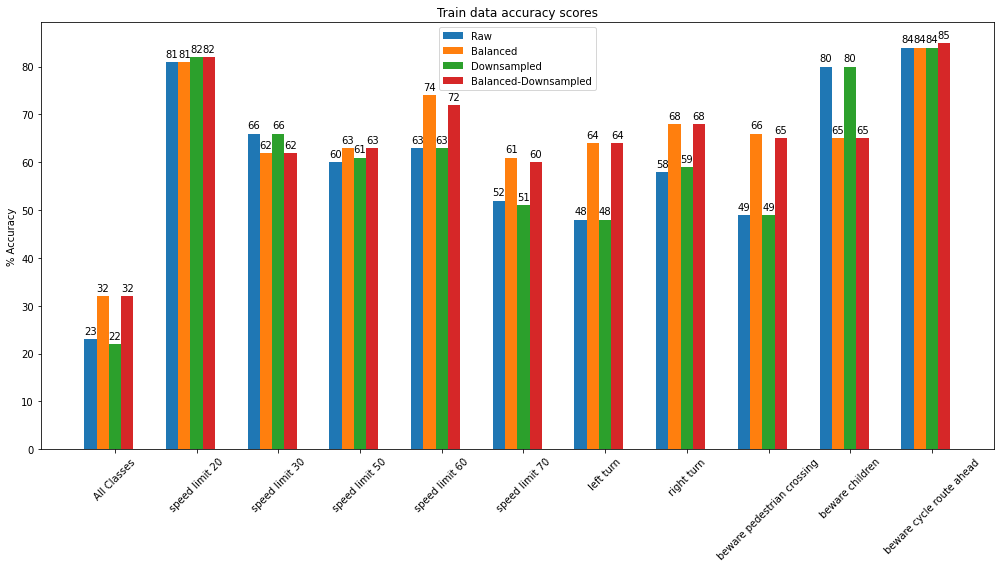

In [6]:
ps.plot_scores(train_scores, ['Raw', 'Balanced',  'Downsampled', 'Balanced-Downsampled'], title='Train data accuracy scores')


### Testing data scores

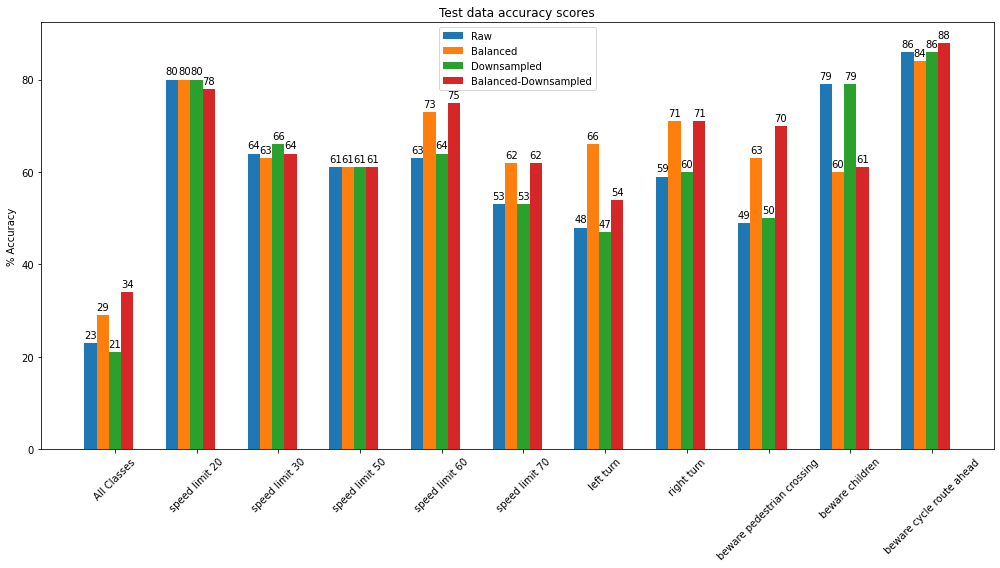

In [7]:
ps.plot_scores(test_scores, ['Raw', 'Balanced',  'Downsampled', 'Balanced-Downsampled'], title='Test data accuracy scores')

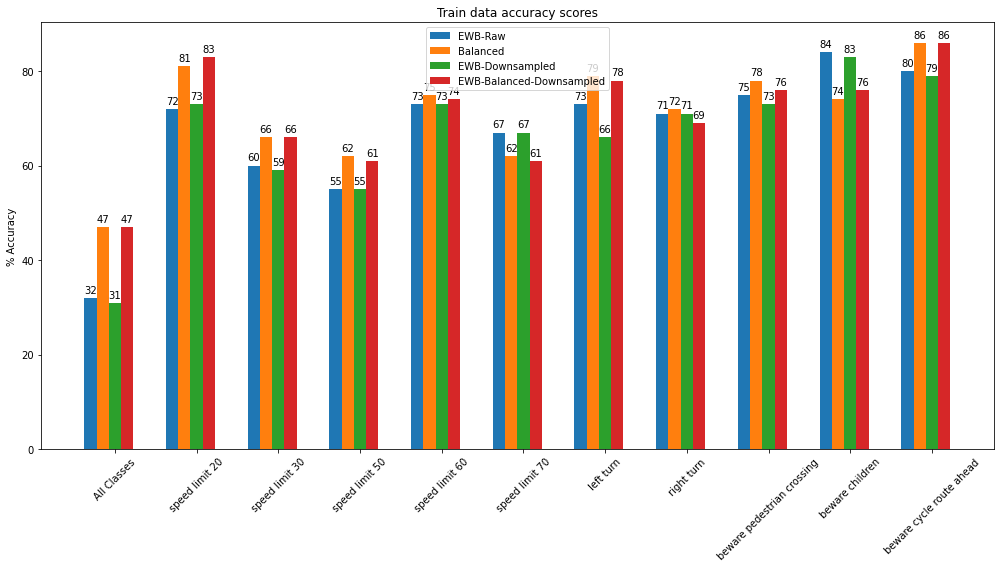

In [8]:
ps.plot_scores(ewb_train_scores, ['EWB-Raw', 'Balanced', 'EWB-Downsampled', 'EWB-Balanced-Downsampled'], title='Train data accuracy scores')


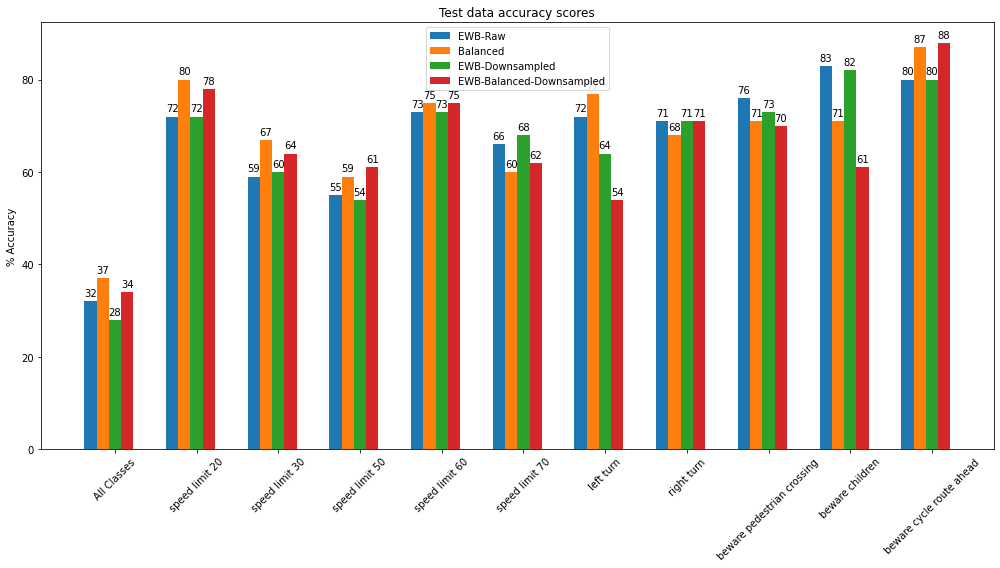

In [10]:
ps.plot_scores(ewb_test_scores, ['EWB-Raw', 'Balanced', 'EWB-Downsampled', 'EWB-Balanced-Downsampled'], title='Test data accuracy scores')

### Constructing all the confusion matrices:

In [11]:
train_conf_unbal, test_conf_unbal = cms.build_confusion_matrix(unbal_classifers, unbal_data)
train_conf_bal, test_conf_bal = cms.build_confusion_matrix(bal_classifers, bal_data)
train_conf_dbal, test_conf_dbal = cms.build_confusion_matrix(dbal_classifiers, dbal_data)

### Display the confusion matrix with kappa values

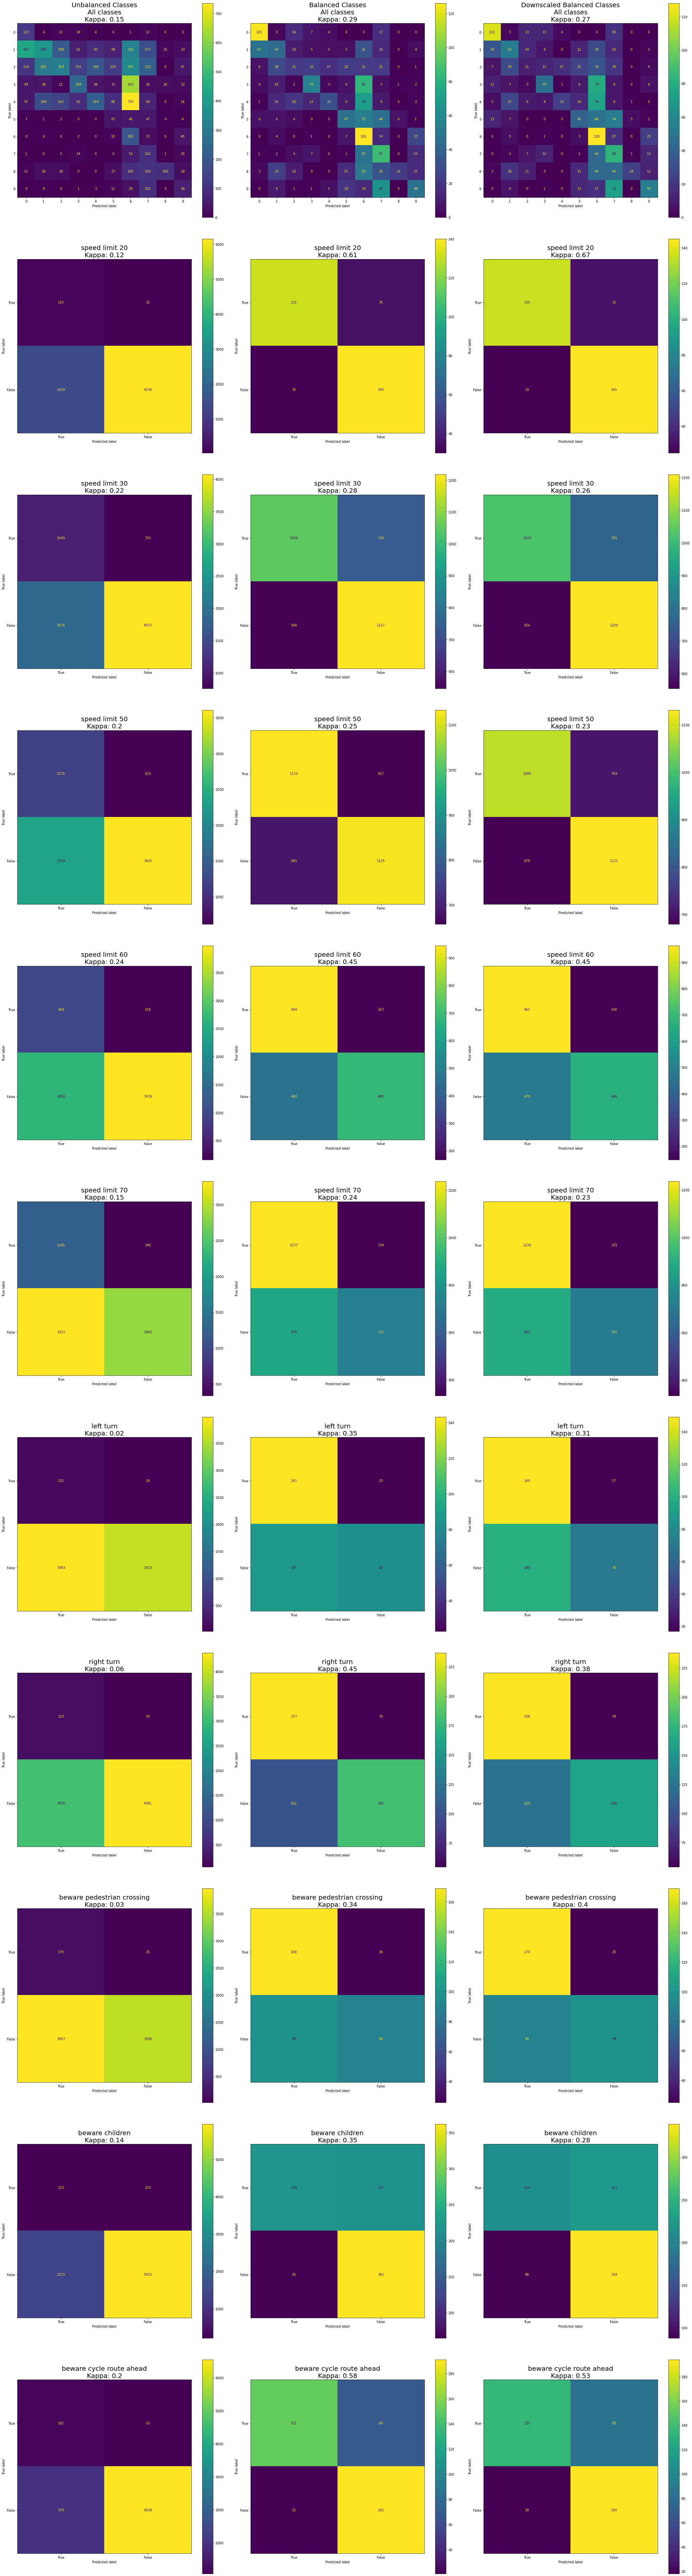

In [13]:
cms.multi_show_confusion_matrix([train_conf_unbal, train_conf_bal, train_conf_dbal], kappas=[cms.kappa(train_conf_unbal), cms.kappa(train_conf_bal), cms.kappa(train_conf_dbal)], col_labels=['Unbalanced Classes', 'Balanced Classes', 'Downscaled Balanced Classes'])